In [ ]:
# Import Required Libraries

In [5]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load the Cancer Dataset

In [7]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
# Standardize the Data

In [9]:
# Separating out the features and target
features = data.feature_names
x = df.loc[:, features].values  # Features
y = df.loc[:, ['target']].values  # Target

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
# Apply PCA

In [11]:
# PCA Projection to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Concatenate the target variable for plotting
final_df = pd.concat([principal_df, df[['target']]], axis=1)

In [ ]:
# Visualize the Results

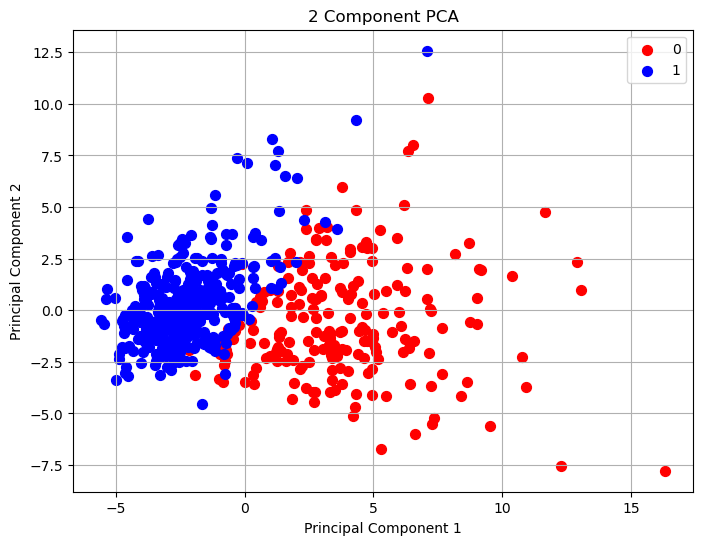

In [13]:
# Plotting the 2 PCA components
plt.figure(figsize=(8, 6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['target'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'principal component 1'],
                final_df.loc[indices_to_keep, 'principal component 2'],
                c=color,
                s=50)

plt.legend(targets, loc='best')
plt.grid()
plt.show()

In [ ]:
# Implementing logistic regression for prediction.

Accuracy: 0.97


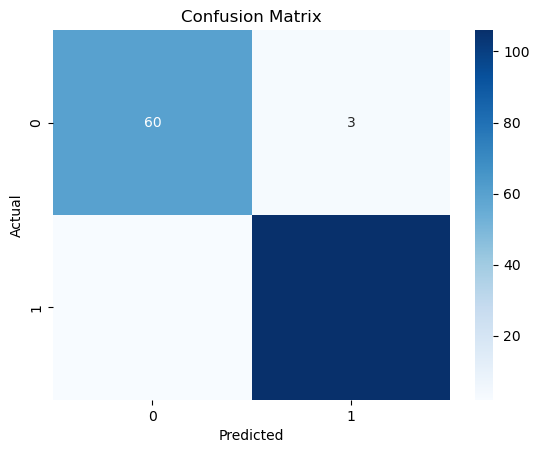

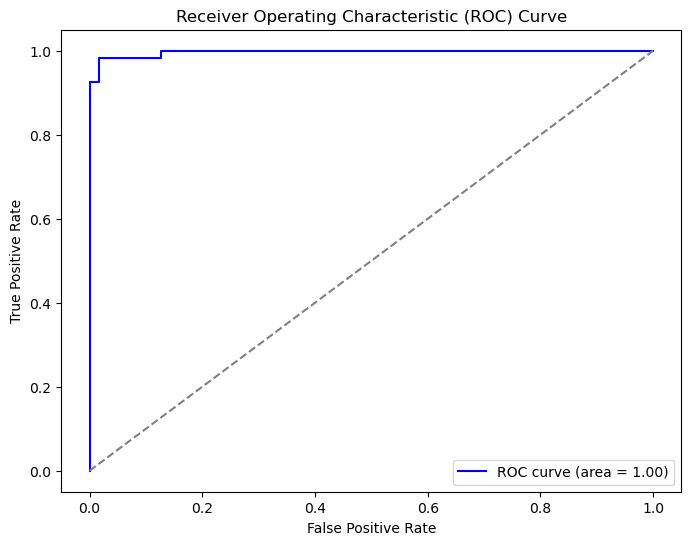

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X = final_df[['principal component 1', 'principal component 2']]
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()